# Задание

Часть 1
1. Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки

Часть 2
2. Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков

In [2]:
#!pip install missingno

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Часть 1

In [4]:
houses_df = pd.read_pickle('houses_dataset')

In [5]:
# размер датасета
houses_df.shape

(10612, 108)

In [6]:
houses_df.head()

,id,pdId,region,address,nameObj,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,1284,1527,77,"г Москва, район внутригородское муниципальное ...","Жилой Комплекс ""Мир Митино"" (сокращенное наиме...",27.0,27.0,1115,2024-12-31,Блоки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1366,1474,23,"г Краснодар, улица им. Героя Яцкова И.В., лите...","Микрорайон ""Губернский""",25.0,25.0,207,2025-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1367,1474,23,"г Краснодар, улица им. Героя Яцкова И.В., лите...","Микрорайон ""Губернский""",1.0,1.0,0,2025-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1368,1476,23,"г Краснодар, улица им. Героя Яцкова И.В., лите...","Микрорайон ""Губернский""",1.0,19.0,321,2025-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1387,1477,23,"г Краснодар, улица им. Героя Яцкова И.В., лите...","Микрорайон ""Губернский""",19.0,20.0,474,2025-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

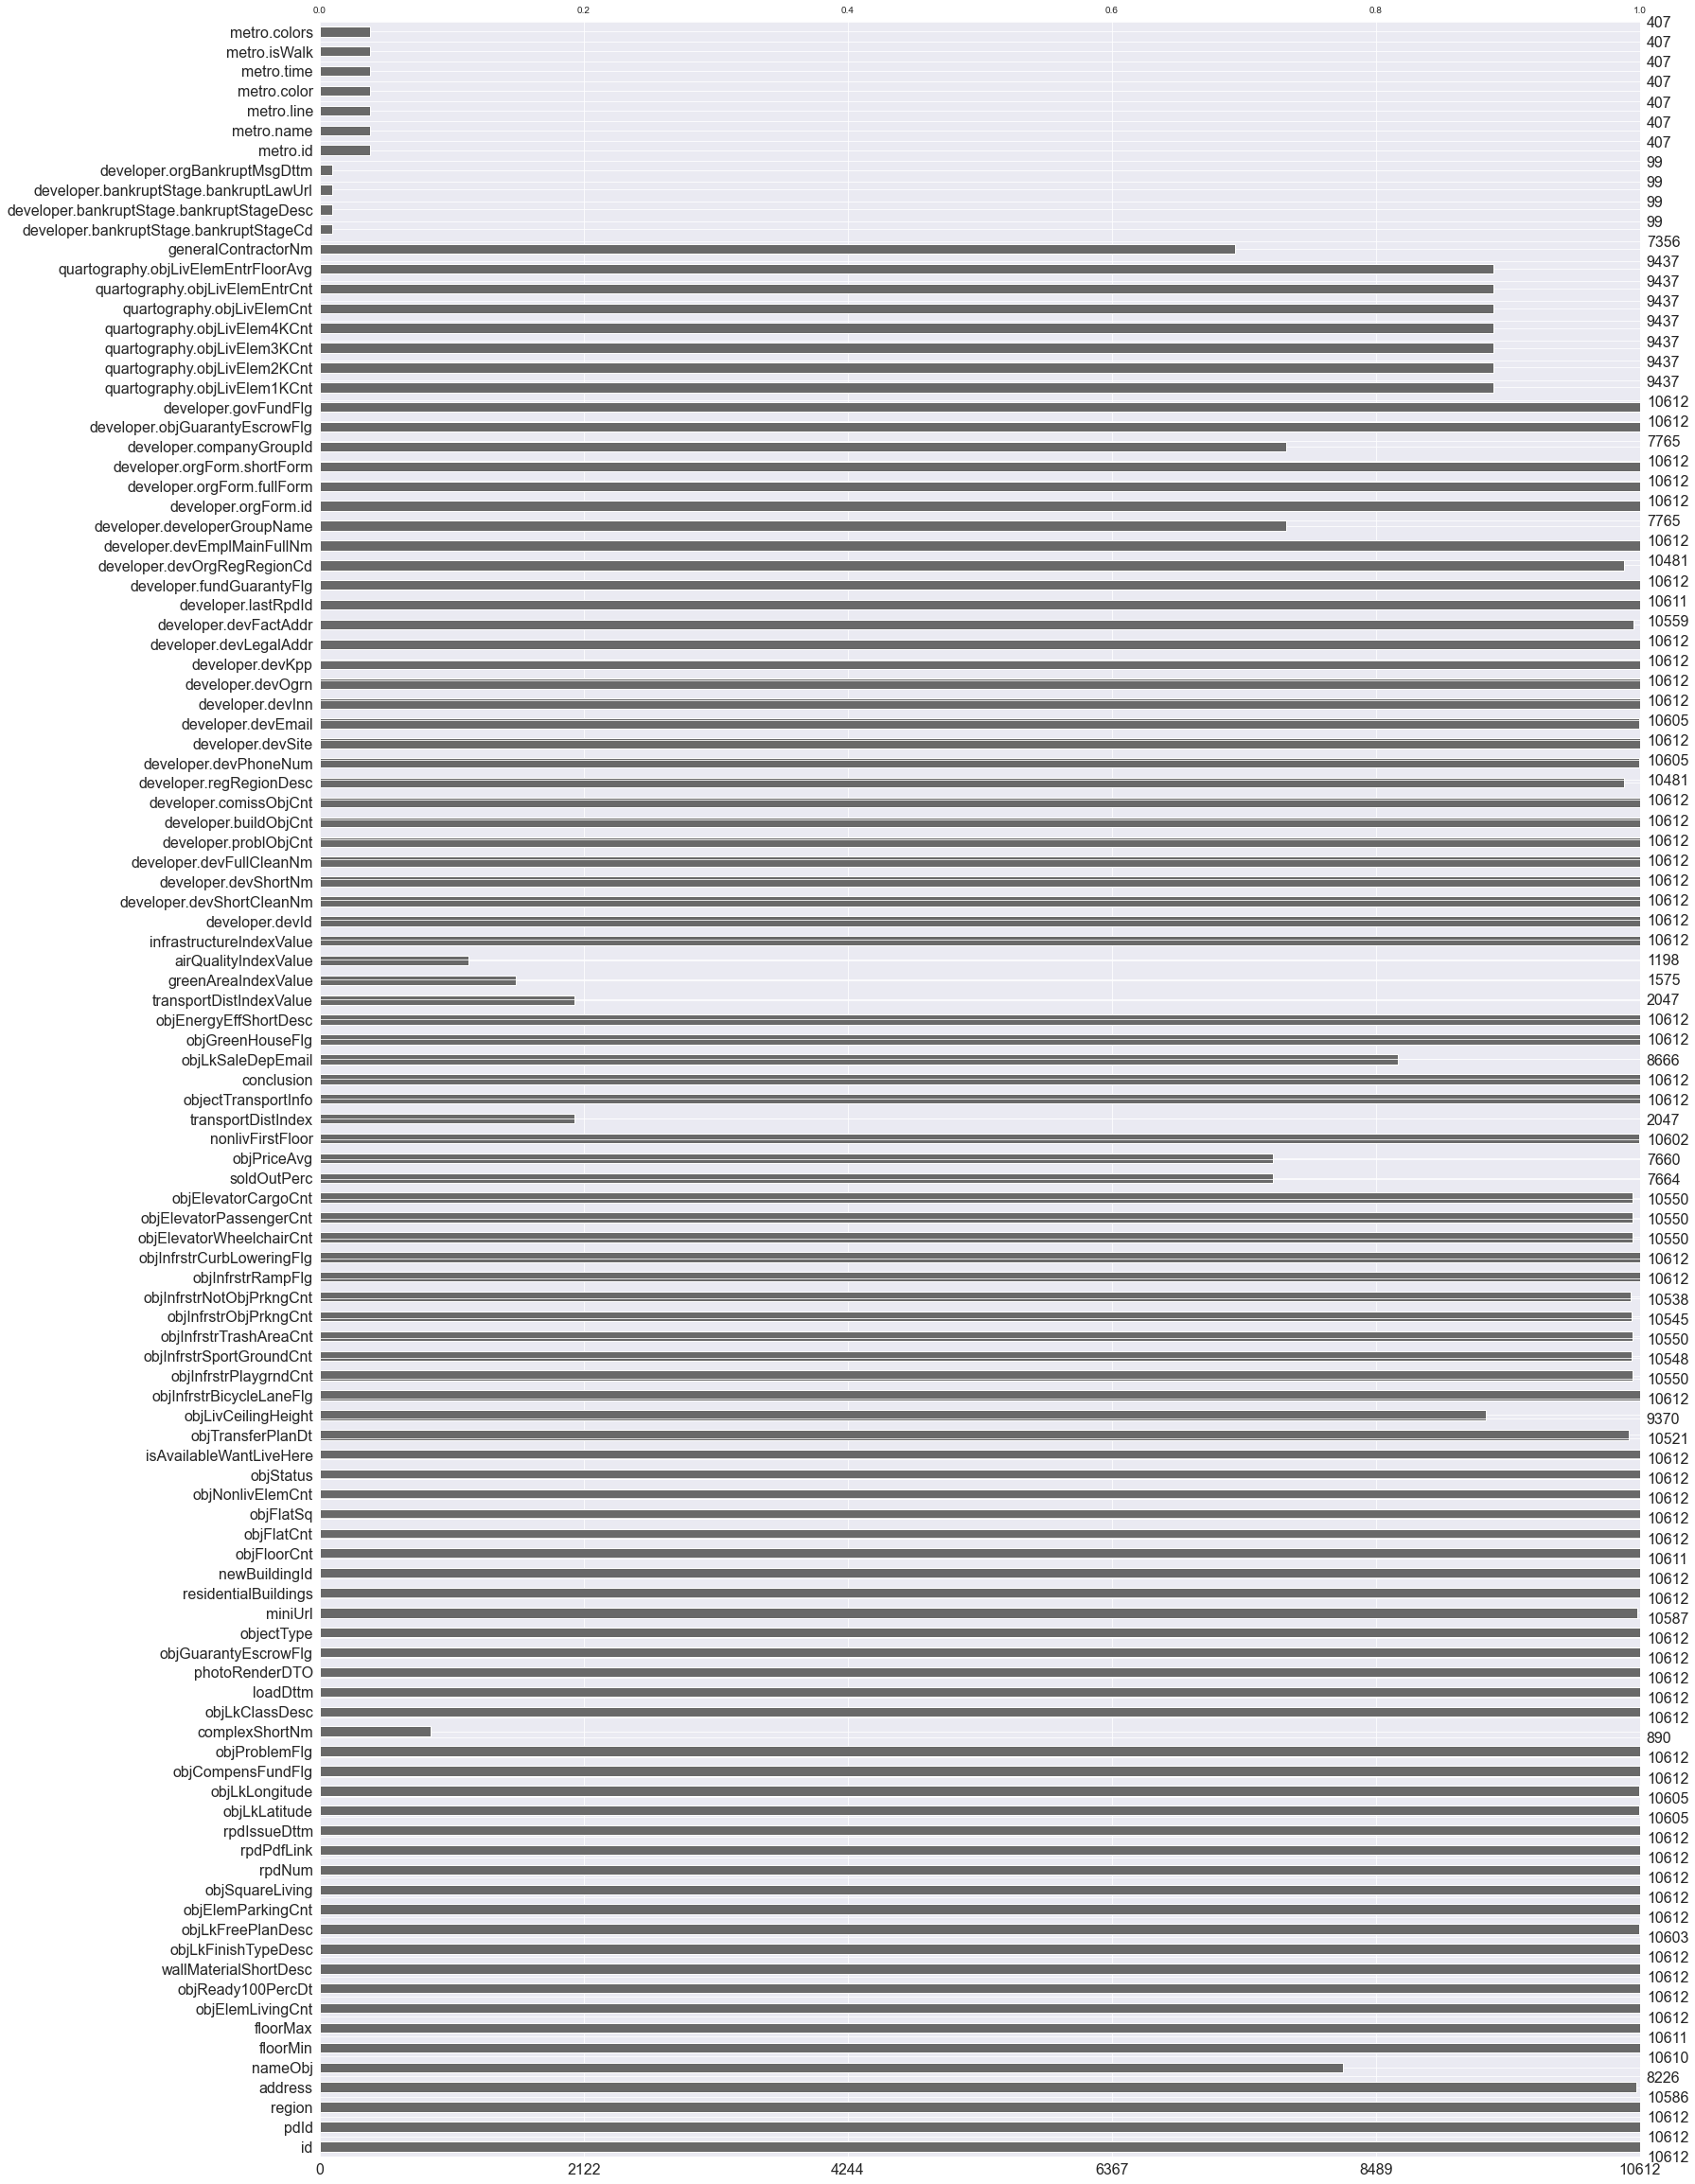

In [8]:
# визуализируем пропуски в датасете
msno.bar(houses_df)

Как видим, пропуски есть. Для категориальных данных, на мой взгляд, самый лучший подход по заполнению пропусков - заполнять их строкой "недостаточно данных", как новая категориальная фича, а для числовых - средним или медианным значением. Но всегда нужно смотреть на качество модели после обучения на этих данных. Нельзя исключать такую ситуацию, что, возможно, качество модели после проделывания вышеперечисленных действий может упасть.
При этом немаловажным фактором при заполнении пропусков является сама сущность фичи. Например, если у новостройки есть параметр, связанный с наличием ближайшей станции метро. Неверным будет для новостроек, находящихся в городах, где нет метро, заполнять этот параметр средним значением, лучше всего будет заполнить, например, отрицательным (например, -1), что соответствует отсутвию метро.

# Часть 2

In [47]:
# Рассчёт и визуализация средней цены за квадратный метр по регионам
# будем анализировать цену по полю "region", так как застройщик может строить в разных регионах
houses_df[['region', 'developer.regRegionDesc']].groupby('developer.regRegionDesc').region.unique()

developer.regRegionDesc
Адыгея Республика                                      [1, 23]
Алтай Республика                                   [42, 4, 22]
Алтайский край                                    [22, 54, 47]
Амурская область                                          [28]
Архангельская область                                 [29, 47]
                                              ...             
Челябинская область                [74, 89, 2, 66, 86, 45, 78]
Чеченская Республика                                      [20]
Чувашская Республика                                  [21, 12]
Ямало-Ненецкий Автономный округ                       [89, 43]
Ярославская область                               [44, 76, 35]
Name: region, Length: 81, dtype: object

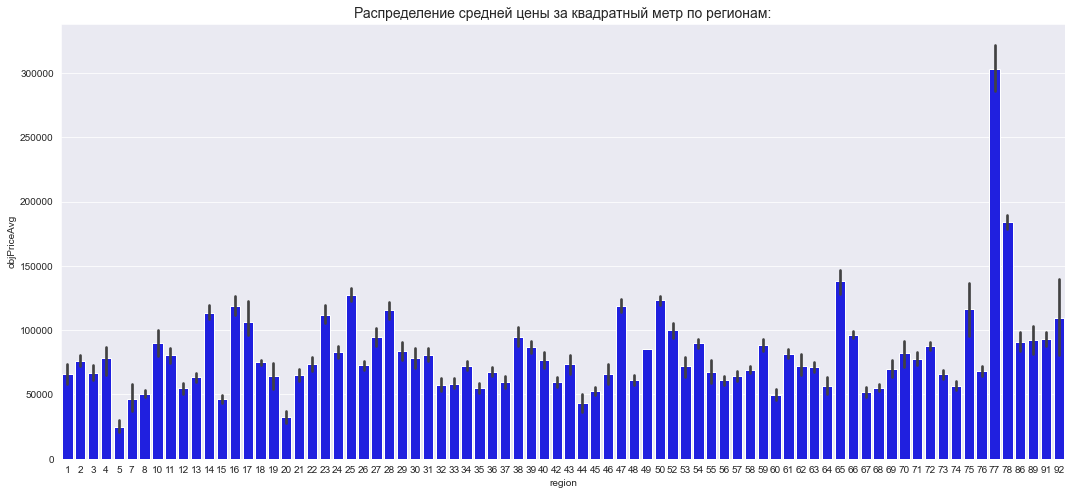

In [58]:
# objPriceAvg - средняя цена квадратного метра в новостройке
# objSquareLiving - жилая площадь

# для новостроек, где есть жилая площадь и стоимость квадратного метра ненулевая
mean_price_per_region = houses_df.query('objSquareLiving > 0 and objPriceAvg > 0').groupby('region').objPriceAvg.mean().reset_index()

plt.figure(figsize=(18, 8))
sns.barplot(data=houses_df.query('objSquareLiving > 0 and objPriceAvg > 0'),
            x='region',
            y='objPriceAvg',
            color='blue')
plt.title('Распределение средней цены за квадратный метр по регионам:', size=14);

In [49]:
print('В топ-5 регионов с наибольшей средней стоимостью квадратного метра жилья входят:')
for i, row in mean_price_per_region.sort_values('objPriceAvg', ascending=False).head(3).iterrows():
    print(f'Регион {row["region"]:.0f}, средняя стоимость квадратного метра: {row["objPriceAvg"]:.0f}')

print('\nВ топ-5 регионов с наименьшей средней стоимостью квадратного метра жилья входят:')
for i, row in mean_price_per_region.sort_values('objPriceAvg', ascending=True).head(3).iterrows():
    print(f'Регион {row["region"]:.0f}, средняя стоимость квадратного метра: {row["objPriceAvg"]:.0f}')

В топ-5 регионов с наибольшей средней стоимостью квадратного метра жилья входят:
Регион 77, средняя стоимость квадратного метра: 302687
Регион 78, средняя стоимость квадратного метра: 184177
Регион 65, средняя стоимость квадратного метра: 138044

В топ-5 регионов с наименьшей средней стоимостью квадратного метра жилья входят:
Регион 5, средняя стоимость квадратного метра: 24696
Регион 20, средняя стоимость квадратного метра: 32742
Регион 44, средняя стоимость квадратного метра: 43420


In [50]:
houses_df

,id,pdId,region,address,nameObj,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,1284,1527,77,"г Москва, район внутригородское муниципальное ...","Жилой Комплекс ""Мир Митино"" (сокращенное наиме...",27.0,27.0,1115,2024-12-31,Блоки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1366,1474,23,"г Краснодар, улица им. Героя Яцкова И.В., лите...","Микрорайон ""Губернский""",25.0,25.0,207,2025-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1367,1474,23,"г Краснодар, улица им. Героя Яцкова И.В., лите...","Микрорайон ""Губернский""",1.0,1.0,0,2025-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1368,1476,23,"г Краснодар, улица им. Героя Яцкова И.В., лите...","Микрорайон ""Губернский""",1.0,19.0,321,2025-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1387,1477,23,"г Краснодар, улица им. Героя Яцкова И.В., лите...","Микрорайон ""Губернский""",19.0,20.0,474,2025-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10607,48066,626837,39,"г Пионерский, ул Октябрьская",Многоквартирные дома.Дом №3,6.0,6.0,45,2025-09-30,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10608,48067,626837,39,"г Пионерский, ул Октябрьская",Многоквартирные дома.Дом №4,6.0,6.0,35,2025-09-30,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10609,48068,626837,39,"г Пионерский, ул Октябрьская",Многоквартирные дома.Дом №5,6.0,6.0,35,2025-09-30,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10610,48069,634207,68,"д Крутые Выселки мкр Слобода, улица Лучезарная...",NaN,5.0,6.0,70,2025-03-31,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


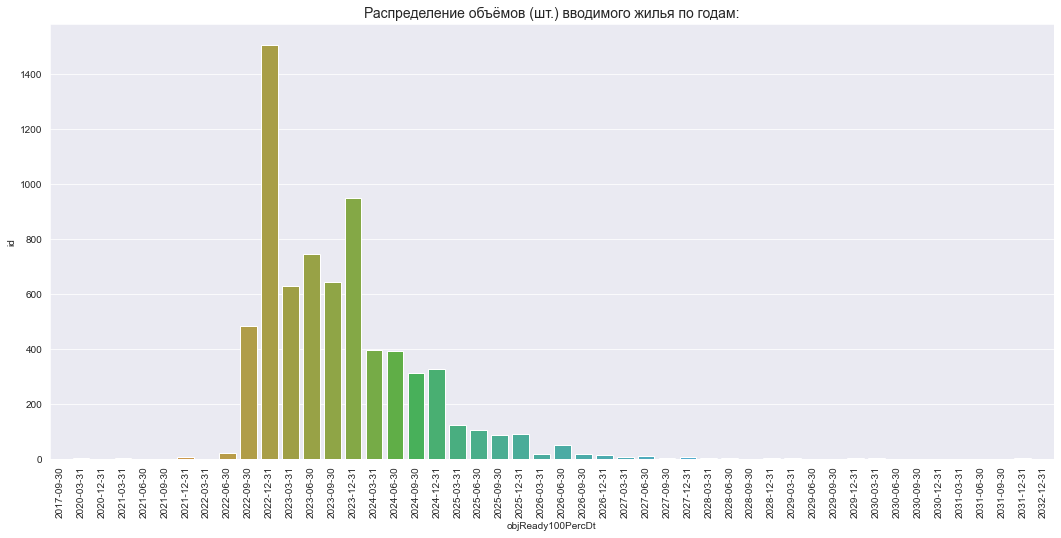

In [59]:
# Распределение объёмов (шт.) вводимого жилья по годам
houses_df.objReady100PercDt = pd.to_datetime(houses_df.objReady100PercDt).apply(lambda x: x.date())

plt.figure(figsize=(18, 8))
sns.barplot(data=houses_df.query('objSquareLiving > 0 and objPriceAvg > 0').sort_values('objReady100PercDt'),
            x='objReady100PercDt',
            y='id',
            estimator=len)
plt.xticks(rotation='vertical')
plt.title('Распределение объёмов (шт.) вводимого жилья по годам:', size=14);

Можно заметить 2 моды среди дат окончания, это:
2022-12-31, примерно ~1900 новостроек будет готово
2023-12-31, примерно ~1400 новостроек

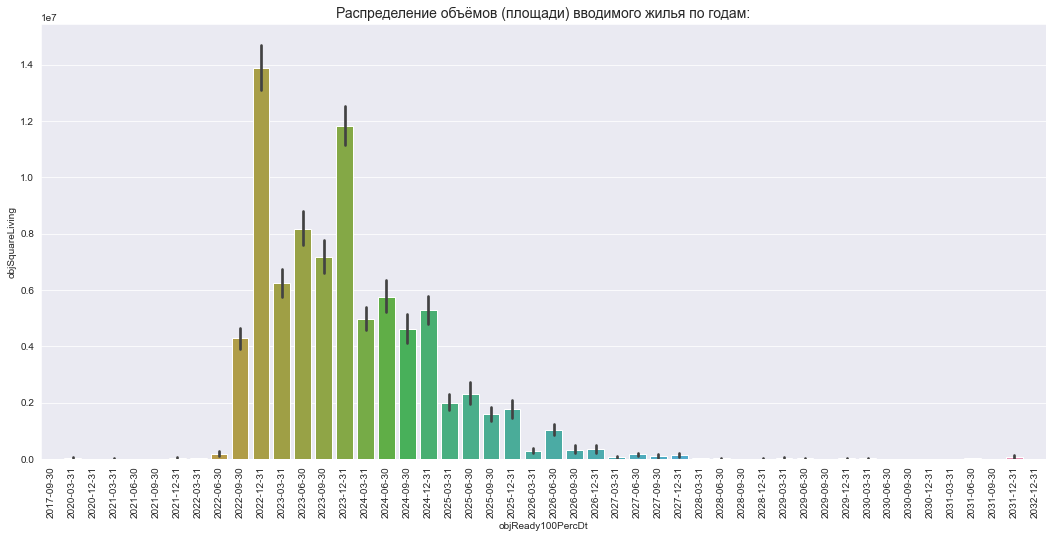

In [60]:
# Распределение объёмов (площади) вводимого жилья по годам
plt.figure(figsize=(18, 8))
sns.barplot(data=houses_df.query('objSquareLiving > 0 and objPriceAvg > 0').sort_values('objReady100PercDt'),
            x='objReady100PercDt',
            y='objSquareLiving',
            estimator=sum)
plt.xticks(rotation='vertical')
plt.title('Распределение объёмов (площади) вводимого жилья по годам:', size=14);

Аналогичная ситуация наблюдается в те же годы - 2022-12-31 и 2023-12-31 - наибольшая площадь вводимого жилья.

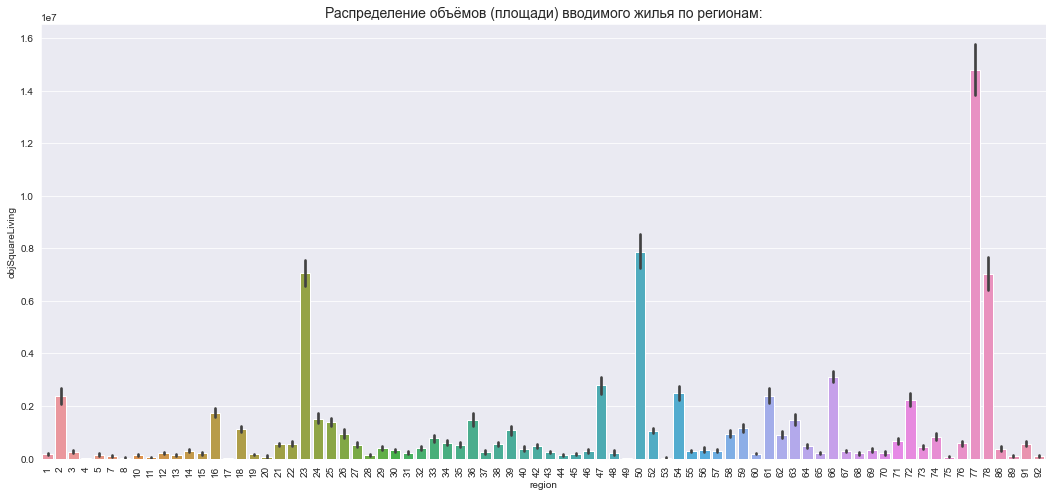

In [62]:
# посмотрим в каких регионах вводится больше всего жилья в штуках и объёмах:
plt.figure(figsize=(18, 8))
sns.barplot(data=houses_df.query('objSquareLiving > 0 and objPriceAvg > 0').sort_values('objReady100PercDt'),
            x='region',
            y='objSquareLiving',
            estimator=sum)
plt.title('Распределение объёмов (площади) вводимого жилья по регионам:', size=14);

В топ-5 регионов по кол-ву вводимого жилья входят:
77, 50, 78, 23 и 66

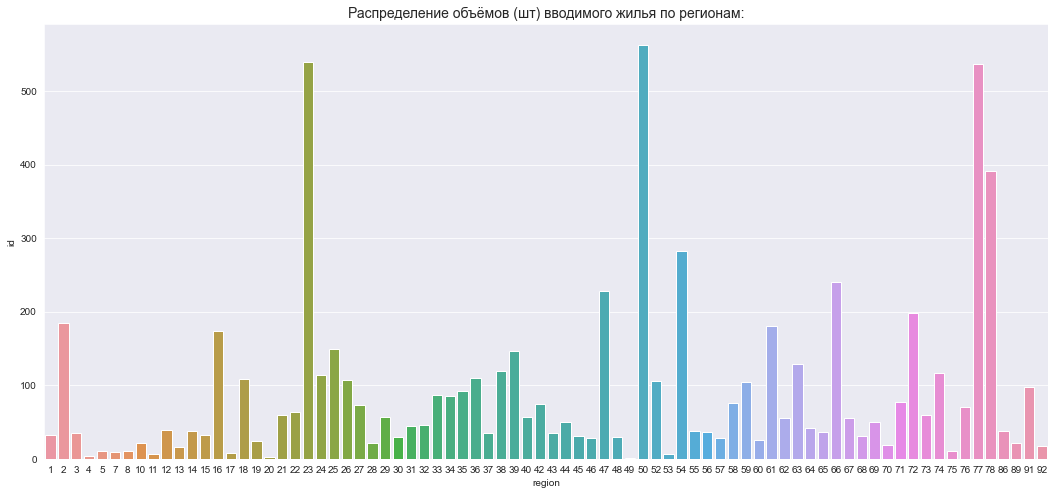

In [65]:
plt.figure(figsize=(18, 8))
sns.barplot(data=houses_df.query('objSquareLiving > 0 and objPriceAvg > 0').sort_values('objReady100PercDt'),
            x='region',
            y='id',
            estimator=len)
plt.title('Распределение объёмов (шт) вводимого жилья по регионам:', size=14);

В топ-5 регионов по суммарной площади вводимого жилья входят:
50, 77, 23, 78 и 54

#

In [69]:
# Посмотрим на виды материала, из которого строятся здание
houses_df.wallMaterialShortDesc.value_counts()

Монолит-кирпич    5512
Кирпич            2367
Другое            1893
Панель             488
Монолит            189
Блоки              163
Name: wallMaterialShortDesc, dtype: int64

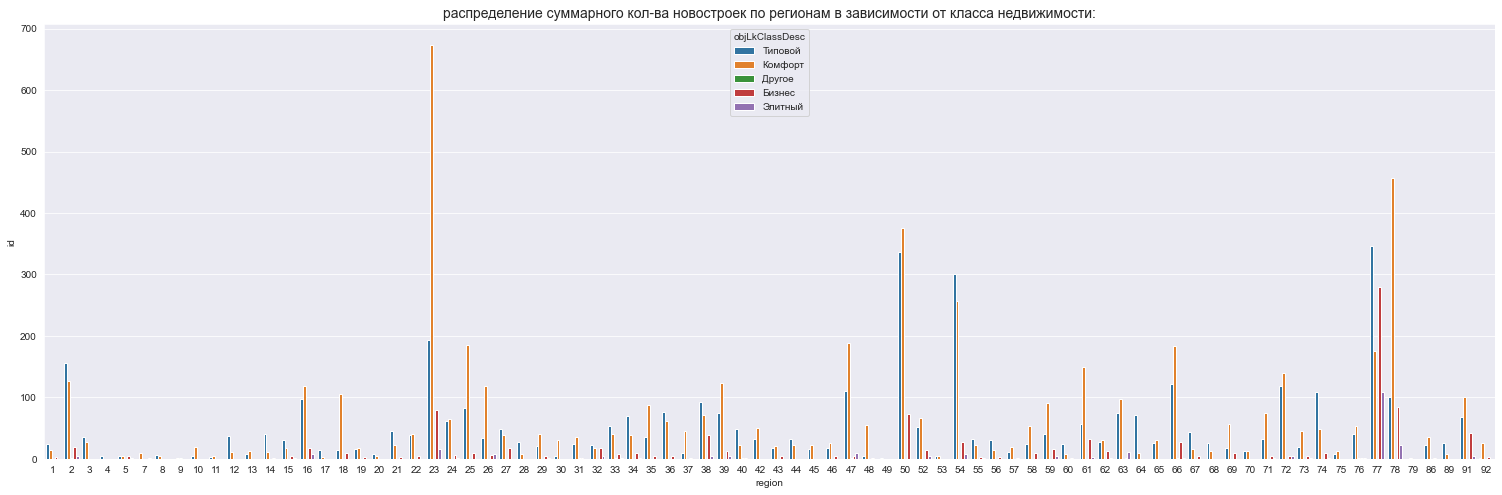

In [78]:
# распределение суммарного кол-ва новостроек по регионам в зависимости от класса недвижимости
plt.figure(figsize=(26, 8))
sns.barplot(data=houses_df.sort_values('objReady100PercDt'),
            x='region',
            y='id',
            hue='objLkClassDesc',
            estimator=len)
plt.title('распределение суммарного кол-ва новостроек по регионам в зависимости от класса недвижимости:', size=14);

Как видим, огромное кол-во квартир класса "Комфорт" строится в 23 регионе. Новостройки класса "Бизнес" преимущественно находятся в 77 регионе.

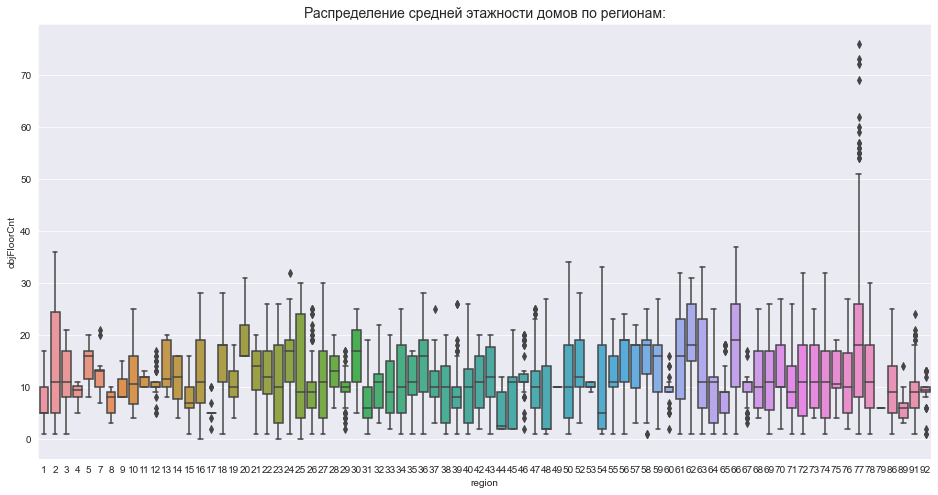

In [80]:
# Распределение средней этажности домов по регионам
plt.figure(figsize=(16, 8))
sns.boxplot(data=houses_df.sort_values('objReady100PercDt'),
            x='region',
            y='objFloorCnt')
plt.title('Распределение средней этажности домов по регионам:', size=14);

Можно заметить, что небоскрёбы (кол-во этажей > 35) находятся в 77 регионе.

In [77]:
houses_df

,id,pdId,region,address,nameObj,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,1284,1527,77,"г Москва, район внутригородское муниципальное ...","Жилой Комплекс ""Мир Митино"" (сокращенное наиме...",27.0,27.0,1115,2024-12-31,Блоки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1366,1474,23,"г Краснодар, улица им. Героя Яцкова И.В., лите...","Микрорайон ""Губернский""",25.0,25.0,207,2025-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1367,1474,23,"г Краснодар, улица им. Героя Яцкова И.В., лите...","Микрорайон ""Губернский""",1.0,1.0,0,2025-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1368,1476,23,"г Краснодар, улица им. Героя Яцкова И.В., лите...","Микрорайон ""Губернский""",1.0,19.0,321,2025-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1387,1477,23,"г Краснодар, улица им. Героя Яцкова И.В., лите...","Микрорайон ""Губернский""",19.0,20.0,474,2025-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10607,48066,626837,39,"г Пионерский, ул Октябрьская",Многоквартирные дома.Дом №3,6.0,6.0,45,2025-09-30,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10608,48067,626837,39,"г Пионерский, ул Октябрьская",Многоквартирные дома.Дом №4,6.0,6.0,35,2025-09-30,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10609,48068,626837,39,"г Пионерский, ул Октябрьская",Многоквартирные дома.Дом №5,6.0,6.0,35,2025-09-30,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10610,48069,634207,68,"д Крутые Выселки мкр Слобода, улица Лучезарная...",NaN,5.0,6.0,70,2025-03-31,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


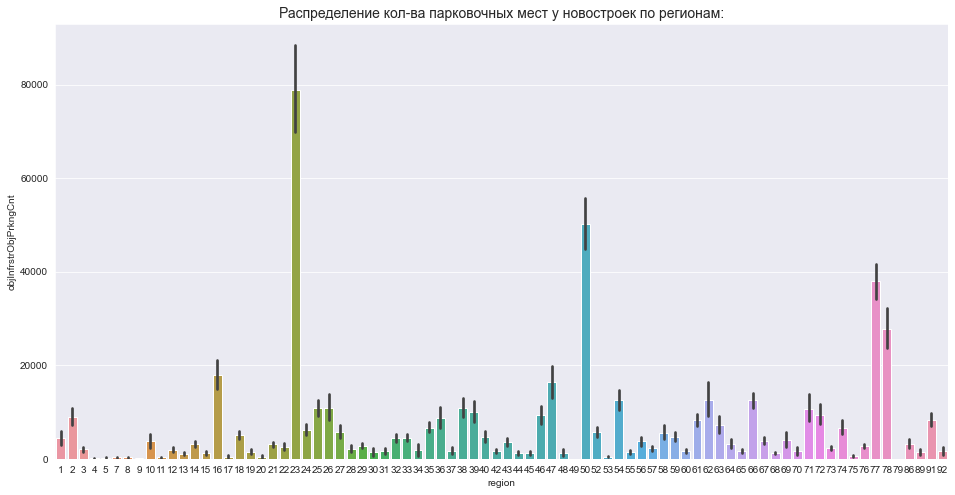

In [83]:
# Распределение кол-ва парковочных мест у новостроек по регионам
plt.figure(figsize=(16, 8))
sns.barplot(data=houses_df.sort_values('objReady100PercDt'),
            x='region',
            y='objInfrstrObjPrkngCnt',
            estimator=sum)
plt.title('Распределение кол-ва парковочных мест у новостроек по регионам:', size=14);

Как видим выделяется особенно 23, 50, 77 и 78 регионы.